Here instead of replacing NA values with mean and median we will assume that values are missing for some reason and we assign NA, by values THAT ARE FAR END OF DISTRIBUTION OF THE VARIABLE

Usually in FINANCE DOMAIN WE USE THIS APPROACH

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score ,classification_report ,confusion_matrix

In [2]:
titanic = pd.read_csv('/Users/nandrajog/Downloads/titanic.csv',low_memory=False)

In [3]:
croped_titanic = titanic[['Age','Fare','Survived']]

In [4]:
pd.DataFrame(croped_titanic.isna().mean())

,0
Age,0.198653
Fare,0.000000
Survived,0.000000


In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(croped_titanic,
                                                 croped_titanic.Survived,train_size = 0.7,random_state=0)

print(X_train.shape)

(623, 3)


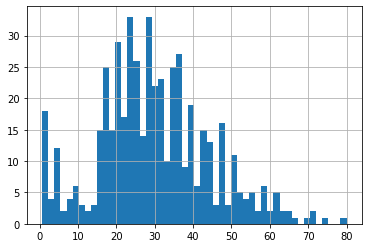

In [6]:
X_train.Age.hist(bins=50)

In [7]:
#Far end of the distribution

outlier =X_train.Age.mean()+3*X_train.Age.std()

The below graph shows OUTLIERS

In [8]:
import seaborn as sns

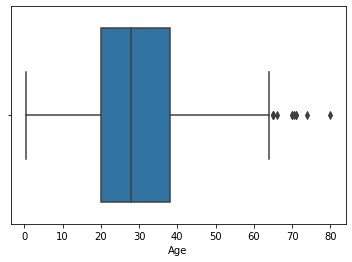

In [9]:
sns.boxplot('Age',data=croped_titanic)

NOW WE ARE GOING TO FILL MISSING VALUES WITH THESE OUTLIERS

In [10]:
median = X_train['Age'].dropna().median()
print(median)

29.0


In [11]:
def Imputer_na(df,col,median,outlier):
    df[col+'_median'] = df[col].fillna(median)
    df[col+'_outliers'] = df[col].fillna(outlier)

In [12]:
Imputer_na(X_train,'Age',median,outlier)

/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
median = X_test['Age'].dropna().median()
print(median)
Imputer_na(X_test,'Age',median,outlier)

27.0


/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/anaconda3/envs/C-vision/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
X_train

,Age,Fare,Survived,Age_median,Age_outliers
857,51.0,26.5500,1,51.0,51.00000
52,49.0,76.7292,1,49.0,49.00000
386,1.0,46.9000,0,1.0,1.00000
124,54.0,77.2875,0,54.0,54.00000
578,NaN,14.4583,0,29.0,73.43632
...,...,...,...,...,...
835,39.0,83.1583,1,39.0,39.00000
192,19.0,7.8542,1,19.0,19.00000
629,NaN,7.7333,0,29.0,73.43632
559,36.0,17.4000,1,36.0,36.00000


Text(0.5, 1.0, 'Missing value replace by median')

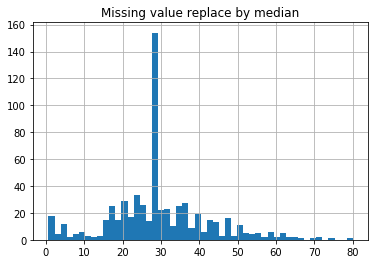

In [15]:
X_train.Age_median.hist(bins=50)
plt.title('Missing value replace by median')

Text(0.5, 1.0, 'Missing value replace by Outliers')

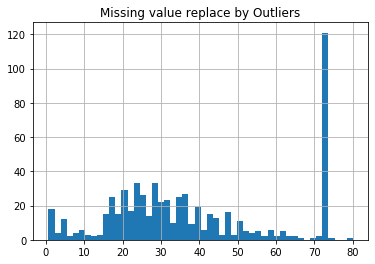

In [16]:
X_train.Age_outliers.hist(bins=50)
plt.title('Missing value replace by Outliers')

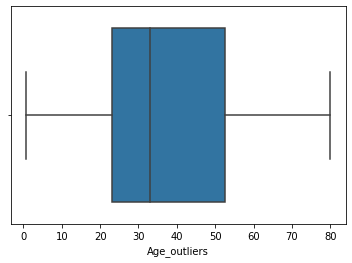

In [17]:
sns.boxplot(X_train.Age_outliers)

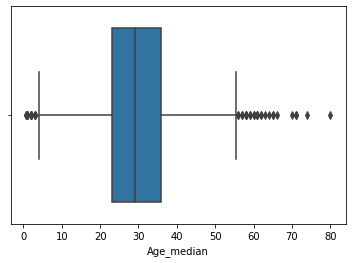

In [18]:
sns.boxplot(X_train.Age_median)

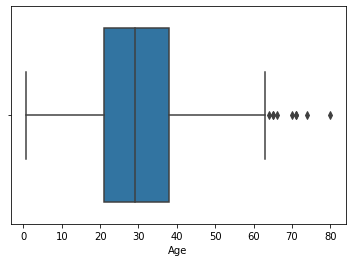

In [19]:
sns.boxplot(X_train.Age)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
std =StandardScaler()

In [22]:
X_test

,Age,Fare,Survived,Age_median,Age_outliers
495,NaN,14.4583,0,27.0,73.43632
648,NaN,7.5500,0,27.0,73.43632
278,7.0,29.1250,0,7.0,7.00000
31,NaN,146.5208,1,27.0,73.43632
255,29.0,15.2458,1,29.0,29.00000
...,...,...,...,...,...
263,40.0,0.0000,0,40.0,40.00000
718,NaN,15.5000,0,27.0,73.43632
620,27.0,14.4542,0,27.0,27.00000
786,18.0,7.4958,1,18.0,18.00000


In [23]:
X_train_rescaled = std.fit_transform(X_train[['Fare', 'Age_median']])
X_test_rescaled = std.fit_transform(X_test[['Fare', 'Age_median']])

In [24]:
Y_train.shape

(623,)

In [33]:
clf_logistic_regression = LogisticRegression(C= 100,random_state=44)
print("Train with median Imputation")
clf_logistic_regression.fit(X_train_rescaled,Y_train)
score = clf_logistic_regression.score(X_train_rescaled,Y_train)
print("Score with median Imputation {}".format(score))
predictions_train= clf_logistic_regression.predict_proba(X_train_rescaled)[:,1]
print("Roc_auc_score  with median Imputation  on Train set {}".format(roc_auc_score(Y_train,predictions_train)))

predictions= clf_logistic_regression.predict_proba(X_test_rescaled)[:,1]
print("Roc_auc_score with median Imputation  on Test set {}".format(roc_auc_score(Y_test,predictions)))

Train with median Imputation
Score with median Imputation 0.6388443017656501
Roc_auc_score  with median Imputation  on Train set 0.6794863451985858
Roc_auc_score with median Imputation  on Test set 0.7226190476190476


/anaconda3/envs/C-vision/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
X_train_outlier = X_train[['Fare','Age_outliers']]
X_test_outlier = X_test[['Fare','Age_outliers']]

In [31]:
X_train_outlier_rescaled = std.fit_transform(X_train[['Fare','Age_outliers']])
X_test_outlier_rescaled = std.fit_transform(X_test[['Fare','Age_outliers']])

In [34]:
clf_logistic_regression = LogisticRegression(C= 100,random_state=44)
print("Train with Outlier Imputation")
clf_logistic_regression.fit(X_train_outlier_rescaled,Y_train)
score = clf_logistic_regression.score(X_train_outlier_rescaled,Y_train)
print("Score with Outlier Imputation {}".format(score))
predictions_train= clf_logistic_regression.predict_proba(X_train_outlier_rescaled)[:,1]
print("Roc_auc_score  with Outlier Imputation  on Train set {}".format(roc_auc_score(Y_train,predictions_train)))

predictions= clf_logistic_regression.predict_proba(X_test_outlier_rescaled)[:,1]
print("Roc_auc_score with Outlier Imputation  on Test set {}".format(roc_auc_score(Y_test,predictions)))

Train with Outlier Imputation
Score with Outlier Imputation 0.6565008025682183
Roc_auc_score  with Outlier Imputation  on Train set 0.6781577406130018
Roc_auc_score with Outlier Imputation  on Test set 0.715952380952381


/anaconda3/envs/C-vision/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
